#  Сессия 3

---

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})

pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_columns=50
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Начинаю как обычно с чтения
df = pd.read_csv("ses2output.csv", encoding="utf-8-sig")

In [3]:
#Вывод того, что есть в дата сете
df.head()

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE,NAME,ADDRESS,CITY,REGION,MCC_NAME,MCC_DESCRIPTION,ID_MEAN,CITY_MEAN,CITY_NAME,CITY_REGION,LAT,LONG,KMCLUSTS,CLUSTERNAME
0,500000001040338895,2,2021-10-17 09:13:55,5814,694.000,16,2,30,2,-1,-1,0,0.000,6.000,mcdonalds,20 KONEVA MKRN,staryj oskol,309512 RUSRUS,Фастфуд,"Торговые точки, продающие готовую еду и напитк...",1137.485,412.830,Staryj Oskol,Белгородская область,51.304,37.813,2,Дорогая покупка
1,500000000049679181,2,2021-08-18 14:08:32,5211,145.000,58,19,41,1,-1,-1,0,0.000,6.000,magkuzma,4 BLD 1 SVERDLOVA STR,staryj oskol,309518 RUSRUS,Лесо- и строительный материал,Продажа в розницу лесо- и строительного матери...,240.062,412.830,Staryj Oskol,Белгородская область,51.304,37.813,0,Бюджетная покупка
2,500000000050884322,1,2021-07-28 10:16:29,5200,167.000,6,6,29,2,-1,-1,0,30000.000,6.000,minstrumentcentr,31 PRIBOROSTROITEL MKRN,staryj oskol,309504 RUSRUS,Товары для дома,"Торговые точки, ориентированные на широкую пуб...",229.000,412.830,Staryj Oskol,Белгородская область,51.304,37.813,0,Бюджетная покупка
3,500000000120521724,2,2021-09-28 12:43:48,5462,75.000,31,15,57,2,1,4,0,0.000,6.000,sp goryachij khleb,62 OLIMPIJSKIJ MKRN,staryj oskol,309511 RUSRUS,Булочные,"Торговые точки, продающие хлебобулочные издели...",468.006,412.830,Staryj Oskol,Белгородская область,51.304,37.813,0,Бюджетная покупка
4,500000000298714811,2,2021-04-08 21:02:41,5411,93.980,23,23,22,2,-1,-1,0,0.000,6.000,pyaterochka,ZELENYJ LOG MKRN,staryj oskol,309516 RUSRUS,"Бакалейные магазины, супермаркеты","Торговые точки, которые продают полную линейку...",139.987,412.830,Staryj Oskol,Белгородская область,51.304,37.813,0,Бюджетная покупка


### 3.1 Визуализация зависимостей данных

Для визуализации я буду использовать heatmap, pivot_tabel, catplot и regplot, так как они наглядно отображают нужный 
мне результат, а именно влияние атрибутов на категории, суммы покупок и предпочтения пользователей по покупкам

In [4]:
#Для преобразавания даты в pandas есть свой метод to_datetime
df["TRANS_DTTM"] = pd.to_datetime(df["TRANS_DTTM"], infer_datetime_format=True)

#### Pivot_tabel

Эту визуализацию буду использовать для отображения нагрузки на категорию продавца в зависимости от дня недели

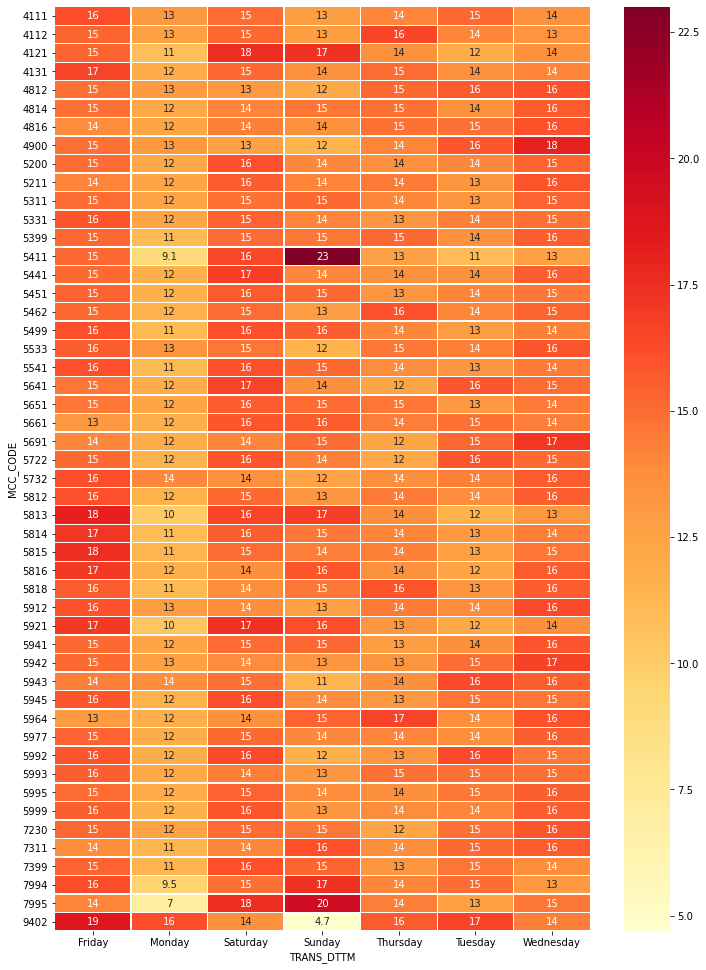

In [5]:
#Создаю сводную таблицу с параметрами для построения визуализации на основе кода категории продавца и дня недели
pt = pd.pivot_table(df, index='MCC_CODE', columns=df["TRANS_DTTM"].dt.day_name(), values='TRANS_DTTM', aggfunc='count')
#получение процентного соотношения
pt = pt.apply(lambda x: round(x / x.sum() * 100,1), axis=1)
#замена всех нанов на 0
pt = pt.fillna(0)
#Размер графика
plt.figure(figsize=(12, 17))
#Отображение
sns.heatmap(pt, annot=True, linewidths=0.4, cmap="YlOrRd");

По сводной таблице выше моэно увидеть, что самые нагружные дни в общем являются пятница и воскресенье, а самой нагруженной категорией продавца является 5411

Теперь посмотрю какие товары пренадлежат этой категории

In [6]:
#Сделал у строки более длинныйы вывод, что бы получить больше информации
pd.options.display.max_colwidth = 300
#Решил узнать, что это за категория и к каким товарам она относится
df[df["MCC_CODE"] == 5411][["MCC_NAME", "MCC_DESCRIPTION"]]

,MCC_NAME,MCC_DESCRIPTION
4,"Бакалейные магазины, супермаркеты","Торговые точки, которые продают полную линейку продуктов питания для домашнего потребления. Пищевые продукты для продажи включают бакалейные товары, мясо, продукты, молочные продукты и консервированные, замороженные, предварительно упакованные и сухие продукты. Также продукты для продажи могут в..."
10,"Бакалейные магазины, супермаркеты","Торговые точки, которые продают полную линейку продуктов питания для домашнего потребления. Пищевые продукты для продажи включают бакалейные товары, мясо, продукты, молочные продукты и консервированные, замороженные, предварительно упакованные и сухие продукты. Также продукты для продажи могут в..."
21,"Бакалейные магазины, супермаркеты","Торговые точки, которые продают полную линейку продуктов питания для домашнего потребления. Пищевые продукты для продажи включают бакалейные товары, мясо, продукты, молочные продукты и консервированные, замороженные, предварительно упакованные и сухие продукты. Также продукты для продажи могут в..."
25,"Бакалейные магазины, супермаркеты","Торговые точки, которые продают полную линейку продуктов питания для домашнего потребления. Пищевые продукты для продажи включают бакалейные товары, мясо, продукты, молочные продукты и консервированные, замороженные, предварительно упакованные и сухие продукты. Также продукты для продажи могут в..."
45,"Бакалейные магазины, супермаркеты","Торговые точки, которые продают полную линейку продуктов питания для домашнего потребления. Пищевые продукты для продажи включают бакалейные товары, мясо, продукты, молочные продукты и консервированные, замороженные, предварительно упакованные и сухие продукты. Также продукты для продажи могут в..."
...,...,...
235069,"Бакалейные магазины, супермаркеты","Торговые точки, которые продают полную линейку продуктов питания для домашнего потребления. Пищевые продукты для продажи включают бакалейные товары, мясо, продукты, молочные продукты и консервированные, замороженные, предварительно упакованные и сухие продукты. Также продукты для продажи могут в..."
235077,"Бакалейные магазины, супермаркеты","Торговые точки, которые продают полную линейку продуктов питания для домашнего потребления. Пищевые продукты для продажи включают бакалейные товары, мясо, продукты, молочные продукты и консервированные, замороженные, предварительно упакованные и сухие продукты. Также продукты для продажи могут в..."
235081,"Бакалейные магазины, супермаркеты","Торговые точки, которые продают полную линейку продуктов питания для домашнего потребления. Пищевые продукты для продажи включают бакалейные товары, мясо, продукты, молочные продукты и консервированные, замороженные, предварительно упакованные и сухие продукты. Также продукты для продажи могут в..."
235083,"Бакалейные магазины, супермаркеты","Торговые точки, которые продают полную линейку продуктов питания для домашнего потребления. Пищевые продукты для продажи включают бакалейные товары, мясо, продукты, молочные продукты и консервированные, замороженные, предварительно упакованные и сухие продукты. Также продукты для продажи могут в..."


Как видно выше, люди любят покупать пищевые продукты в воскресенье

In [7]:
#вернул уменьшеный вариант
pd.options.display.max_colwidth = 100

#### Heatmap

Теперь при помощи тепловой карты получу корреляцию и соответственно влияние всех атрибутов на предпочтение пользователей по покупкам (кластер из прошлой сессиия)

<AxesSubplot:>

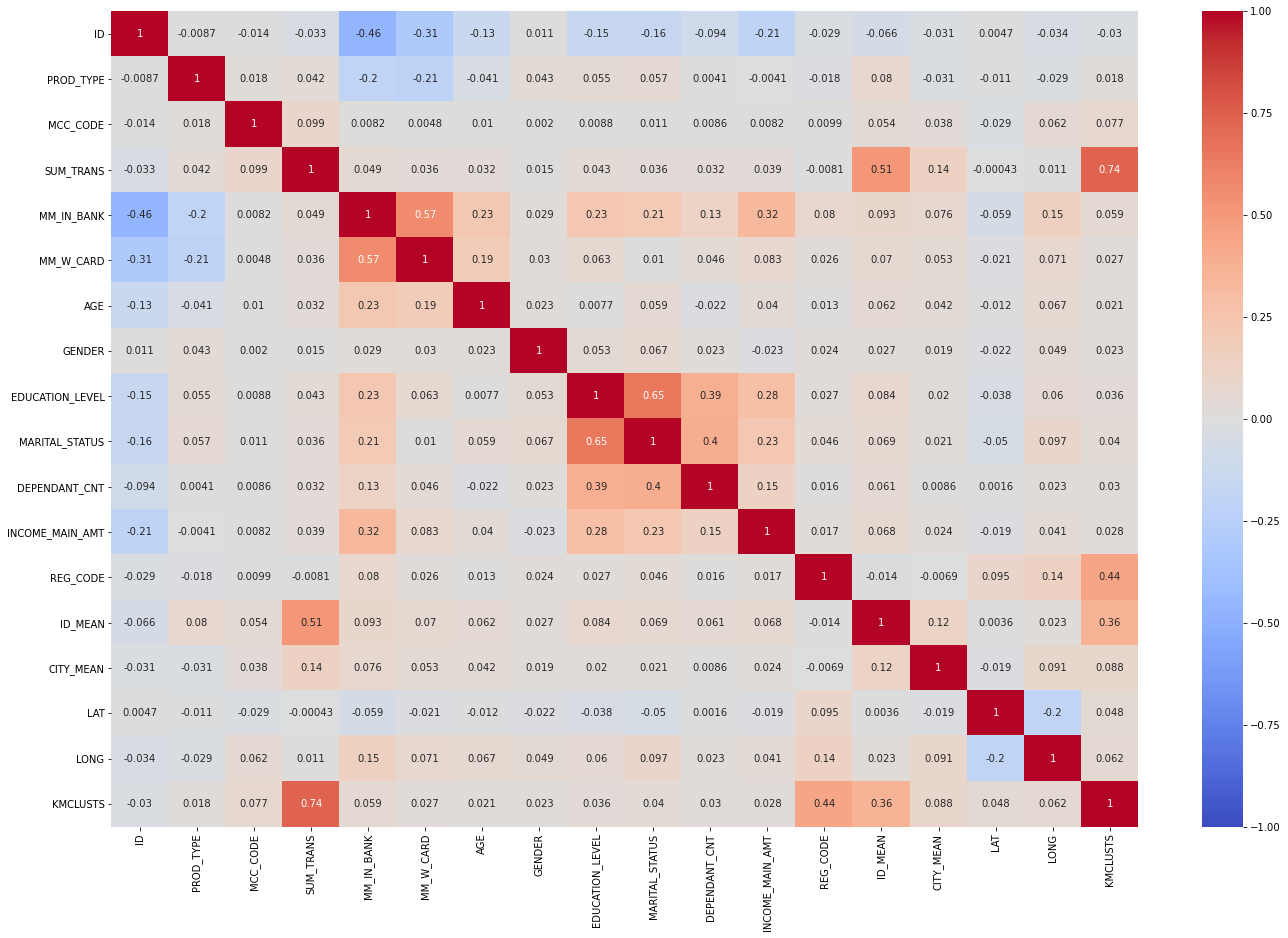

In [8]:
#Задал размер фигуры
plt.figure(figsize=(23, 15))
#Настроил параметра и атрибуты тепловой карты
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1,cmap= 'coolwarm')

Выше видно, что на предпочтения пользователей по покупкам оказывает сумму транзакции, что означает, то что люди всегда обращают внимание на ценник прежде чем, что то преобрести, а так же не мало важным атрибутом является код региона, а это значит, что люди имеют разный доход в зависимости от региона 

#### Catplot

Исходя из прошлой визуализации, можно узнать что сумма покупок и предпочтение по покупкам, имеют сильную зависимость друг от друга, теперь стало интересно, как влияет на это гендерная принадлежность, обычно трактовка подразумивает male\female и исходя из этого сделаю вывод, что 1 - это мужской пол, а 2 - женский, -1 - означает, что пол не указан

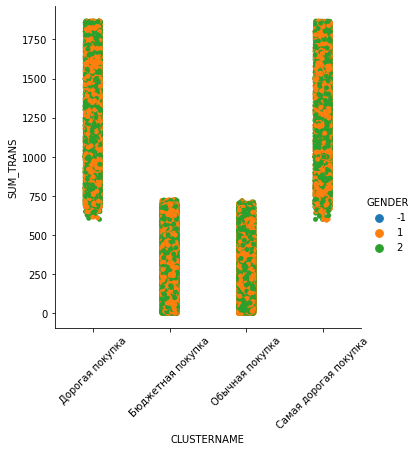

In [9]:
#Задам графику 3 атрибута
sns.catplot(x="CLUSTERNAME", y="SUM_TRANS", hue="GENDER", data=df)
#Для более удобного прочтения, поверну названия на 45 градусов
plt.xticks(rotation=45)
#Выведу график
plt.show()

Выше можно заметить, что какого-то сильного отрыва в предпочтениях и стоимости покупки в зависимости от гендера нет, но все же мужчины покупают больше, особенно в дорогом сегменте

#### Regplot

На последок визуализирую зависимость стоимости покупки от возраста

<AxesSubplot:xlabel='AGE', ylabel='SUM_TRANS'>

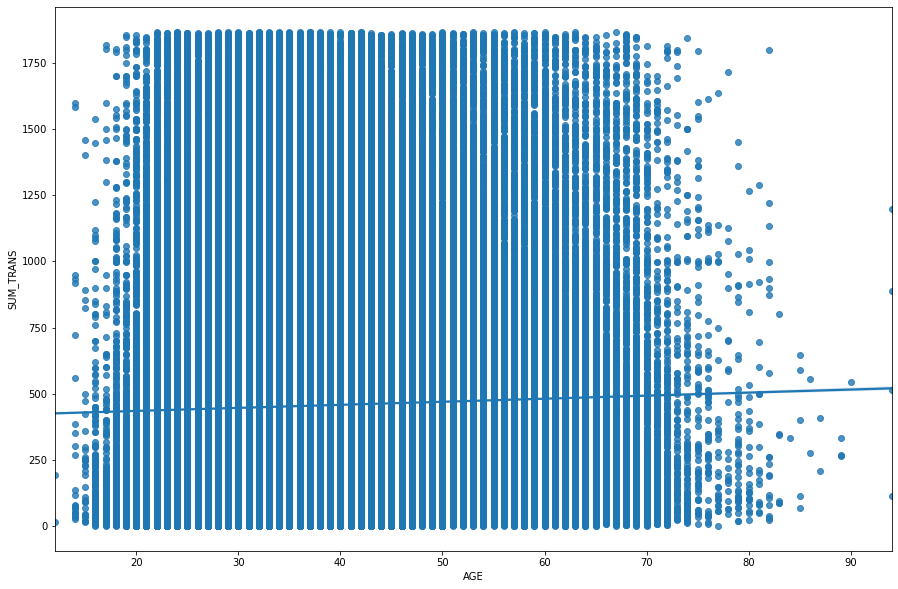

In [10]:
#Задал размер фигуры
plt.figure(figsize=(15, 10))
#Задал параметры визуализации
sns.regplot(x="AGE", y="SUM_TRANS", data=df)

На графике выше видно, что самые дорогие транзакции совершаются в возрасте от 30 до 70 лет

### 3.2 Классификация предпочтений пользователей

Я буду использовать для этой задачи следующие алгоритмы: KNN, GaussianNB и LogisticRegression. Я выбрал их, так как они хорошо подходят для данной задачи. В них совмещается хорошоая скорость работы и высокая точность. Эти алгоритмы были разработанны специально для вычислений на средних обьемах данных

In [11]:
#Импортирую эти алгоритмы
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### 3.3 Обучение

Для классификации возьму несколько атрибутов

In [12]:
#Помещу их в переменную X
X = df[["MCC_CODE", "SUM_TRANS", "REG_CODE", "ID_MEAN"]]
y = df["CLUSTERNAME"]

#### Предобработка данных

Прежде чем проводить классификацию, данные необходимо предобработать

##### MinMaxScaler

Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.

In [13]:
from sklearn.preprocessing import MinMaxScaler
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

#### train_test_split

Теперь разделю данные на обучающую и тестовую выборку

In [14]:
from sklearn.model_selection import train_test_split
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Разделю данные на обучающую и тестовую выборки при помощи параметра stratify, который позволит поместить все типы класеров ронвномерно в обучающую и тестовую выборки

#### KNN

Начну обучать с KNN, этот алгоритм работает по средством определение ближайших точек (соседей)

In [15]:
#Объявление классификатор
neigh = KNeighborsClassifier(n_neighbors=2, leaf_size=10, p=3, n_jobs=-1)
#Обучение классификатора
neigh.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_jobs=-1, n_neighbors=2, p=3)

#### GaussianNB

Наивные байесовские методы представляют собой набор алгоритмов обучения с учителем, основанных на применении теоремы Байеса с «наивным» предположением об условной независимости между каждой парой признаков при заданном значении переменной класса.  Теорема Байеса устанавливает следующую связь, учитывая переменную класса и зависимый вектор признаков.

In [16]:
#Объявление классификатор
gnb = GaussianNB()
#Обучение классификатора
gnb.fit(X_train, y_train)

GaussianNB()

#### LogisticRegression

В случае с несколькими классами алгоритм обучения использует схему «один против остальных» (OvR)<br>
Этот класс реализует регуляризованную логистическую регрессию с использованием библиотеки liblinear

In [17]:
#Объявление классификатор
clf = LogisticRegression(random_state=42, C=10.0, fit_intercept=False)
#Обучение классификатора
clf.fit(X_train, y_train)

LogisticRegression(C=10.0, fit_intercept=False, random_state=42)

#### Метрики

Теперь посмотрю на результаты метрик, я буду рассматривать метрики - f1 и accuracy sore, f так же f1 по macro avg

In [18]:
#Импорт пакета с метриками
from sklearn.metrics import classification_report

##### KNN

In [19]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neigh.predict(X_test)))

                       precision    recall  f1-score   support

    Бюджетная покупка       0.99      1.00      0.99     31923
      Дорогая покупка       0.99      0.97      0.98      9804
      Обычная покупка       0.99      1.00      0.99     22211
Самая дорогая покупка       1.00      0.97      0.98      6593

             accuracy                           0.99     70531
            macro avg       0.99      0.98      0.99     70531
         weighted avg       0.99      0.99      0.99     70531



Очень хорошие показатели метрик, переобучение не не наблюдается, обе из выбранных метрик показывают 0.99

##### GaussianNB

In [20]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, gnb.predict(X_test)))

                       precision    recall  f1-score   support

    Бюджетная покупка       0.98      0.98      0.98     31923
      Дорогая покупка       0.93      0.97      0.95      9804
      Обычная покупка       0.99      0.97      0.98     22211
Самая дорогая покупка       0.94      0.97      0.95      6593

             accuracy                           0.98     70531
            macro avg       0.96      0.97      0.97     70531
         weighted avg       0.98      0.98      0.98     70531



Тут тоже не плохо, но все же меньше чем у KNN, f1 accuracy показал 0.98, а f1 macro avg 0.97

##### LogisticRegression

In [21]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, clf.predict(X_test)))

                       precision    recall  f1-score   support

    Бюджетная покупка       0.87      0.79      0.83     31923
      Дорогая покупка       0.84      0.84      0.84      9804
      Обычная покупка       0.80      0.90      0.85     22211
Самая дорогая покупка       0.73      0.78      0.75      6593

             accuracy                           0.83     70531
            macro avg       0.81      0.82      0.82     70531
         weighted avg       0.83      0.83      0.83     70531



Логистическа регрессия, показала резултат еще хуже, f1 accuracy показал 0.83, а f1 macro avg 0.82

#### Решение

По итогам метрик, остановлюсь на алгоритме KNN, так как он имеет самые высокие показатели, по f1 accuracy показал 0.99, и f1 macro avg 0.99

### 3.4 Feature Engineering

После того как был выбран алгоритм, можно попробовать увеличить точность его работы при помощи преобразования набора данных

Преобразую набор данных, путем добавления в него нового атрибута, с целью повышения точности классификации

In [22]:
#Решил добавить новый атрибут день недели
df['dayofweek'] = df['TRANS_DTTM'].map(lambda x: x.weekday())

Теперь проделаю те же самые действия, что и выше, только с новым атрибутом

In [23]:
#Помещу их в переменную X
X = df[["MCC_CODE", "SUM_TRANS", "REG_CODE", "ID_MEAN", "dayofweek"]]
y = df["CLUSTERNAME"]

#### Предобработка данных

Прежде чем проводить классификацию, данные необходимо предобработать

##### MinMaxScaler

Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.

In [24]:
scalerF = MinMaxScaler()
#преобразую данные
X = scalerF.fit_transform(X)

#### train_test_split

Теперь разделю данные на обучающую и тестовую выборку

In [25]:
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Разделю данные на обучающую и тестовую выборки при помощи параметра stratify, который позволит поместить все типы класеров ронвномерно в обучающую и тестовую выборки

#### KNN

Начну обучать с KNN, этот алгоритм работает по средством определение ближайших точек (соседей)

In [26]:
#Объявление классификатор
neighF = KNeighborsClassifier(n_neighbors=2, leaf_size=10, p=3, n_jobs=-1)
#Обучение классификатора
neighF.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_jobs=-1, n_neighbors=2, p=3)

#### Метрики

Теперь посмотрю на результаты метрик, я буду рассматривать метрики - f1 и accuracy sore, f так же f1 по macro avg

In [27]:
#Импорт пакета с метриками
from sklearn.metrics import classification_report

##### KNN

In [28]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neighF.predict(X_test)))

                       precision    recall  f1-score   support

    Бюджетная покупка       0.98      1.00      0.99     31923
      Дорогая покупка       0.99      0.95      0.97      9804
      Обычная покупка       0.99      0.99      0.99     22211
Самая дорогая покупка       0.99      0.94      0.97      6593

             accuracy                           0.99     70531
            macro avg       0.99      0.97      0.98     70531
         weighted avg       0.99      0.99      0.98     70531



Как видно выше, повышение точности классификации не произашло, а даже наоборот, все стало только хуже

### 3.5 Валидация моделей и экспорт

Импортирую данные для тестированиея

In [29]:
#Как и выше использую read_csv
test_1 = pd.read_csv("data/test_1.csv", encoding="utf-8-sig", sep=";")
test_2 = pd.read_csv("data/test_2.csv", encoding="utf-8-sig", sep=";")

Теперь небольшая обработка

In [30]:
#Выполнил объединение при помощи merge
df_test = pd.merge(test_1, test_2, on="ID")
#Посмотрел сколько пропусков  всего в наборе данных
df_test.isna().sum()

ID                       0
PROD_TYPE                0
TRANS_DTTM               0
MCC_CODE                 0
SUM_TRANS                0
LOCATION_NAME      2627939
MM_IN_BANK               0
MM_W_CARD                0
AGE                      0
GENDER                   0
EDUCATION_LEVEL          0
MARITAL_STATUS           0
DEPENDANT_CNT            0
INCOME_MAIN_AMT    1573686
REG_CODE             10177
dtype: int64

Преобразование типов данных

In [31]:
#Заменю запятую на точку для преобразования данных во float
df_test["SUM_TRANS"] = df_test["SUM_TRANS"].str.replace(",", ".").astype(float)
#Для преобразавания даты в pandas есть свой метод to_datetime
df_test["TRANS_DTTM"] = pd.to_datetime(df_test["TRANS_DTTM"], infer_datetime_format=True)

Добавил необходимый для кдасстфткации атрибут

In [32]:
#Сделал атрибут, в котором посчитал среднее количество потраченных денег на покупки у пользователя
df_test = pd.merge(df_test, df_test.groupby(by="ID")["SUM_TRANS"].mean().reset_index(name="ID_MEAN"))

In [33]:
#Удалю все пропуски, так как они тут не нужны
df_test.dropna(inplace=True)
#Сделал реиндексацию
df_test.reset_index(drop=True, inplace=True)
#Вывод
df_test.head()

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE,ID_MEAN
0,500000002152261401,2,2021-08-25 13:30:06,5993,125.000,TABAK..\27 VESENNYAYA STR\MEZHDURECHENS\652877 RUSRUS,8,8,26,2,-1,-1,0,18000,21.000,472.889
1,500000002152261401,2,2021-08-24 19:36:33,5499,299.000,ROMANTIKA\TSN ROMANTIKA\MEZHDURECHENS\652870 RUSRUS,8,8,26,2,-1,-1,0,18000,21.000,472.889
2,500000002152261401,2,2021-08-22 17:22:51,5912,138.470,APTEKA G. MEZHDURECHEN\11 YUNOSTI STR\MEZHDURECHENS\652877 RUSRUS,8,8,26,2,-1,-1,0,18000,21.000,472.889
3,500000002152261401,2,2021-08-22 07:06:44,5200,189.000,IP SHVEJBS EV\27 VESENNYAYA STR\MEZHDURECHENS\652877 RUSRUS,8,8,26,2,-1,-1,0,18000,21.000,472.889
4,500000002152261401,2,2021-09-28 06:32:50,5814,359.000,PIROGOVAYA\31 STROITELEJ PR-T\MEZHDURECHENS\652870 RUSRUS,8,8,26,2,-1,-1,0,18000,21.000,472.889


Теперь оставлю только нужные атрибуты и приступлю к классификации

In [34]:
#Оставил только нужное для классификации
x_test = df_test[["MCC_CODE", "SUM_TRANS", "REG_CODE", "ID_MEAN"]]

##### MinMaxScaler

Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.

In [35]:
X2 = scaler.transform(x_test)
#помещу предсказание в новый столбец
df_test["CLASSIFY"] = neigh.predict(X2)

Ниже можно увидеть результат классификации

In [36]:
df_test[["CLASSIFY", "SUM_TRANS"]].head()

,CLASSIFY,SUM_TRANS
0,Бюджетная покупка,125.000
1,Бюджетная покупка,299.000
2,Бюджетная покупка,138.470
3,Бюджетная покупка,189.000
4,Бюджетная покупка,359.000


Классифифкатор определеил верные метки, теперь можно экспортировать модель

#### Экспорт моделей

Для экспорта моделей воспользуюсь библиотекой pickle

In [37]:
import pickle

Хочу дополнительно сохранить модель MinMaxScaler

In [38]:
#Название файла, в который сохраню модель
filename = 'scaler.sav'
#Сохранение модели
pickle.dump(scaler, open(filename, 'wb'))

А так же сохраню модель после Feature Engineering

In [39]:
#Название файла, в который сохраню модель
filename = 'scalerF.sav'
#Сохранение модели
pickle.dump(scalerF, open(filename, 'wb'))

Теперь сохраню модели

In [40]:
#Название файла, в который сохраню модель
filename = 'neigh.sav'
#Сохранение модели
pickle.dump(neigh, open(filename, 'wb'))

А так же сохраню модель после Feature Engineering

In [41]:
#Название файла, в который сохраню модель
filename = 'neighF.sav'
#Сохранение модели
pickle.dump(neighF, open(filename, 'wb'))

### 3.6 Подготовка отчета

В ходе работы было выполнено:
* 3.1 Визуализация зависимостей данных - Визуализация данных при помомщи: heatmap, pivot_tabel, catplot и regplot; Визуализация отражает влияние атрибутов на категории, суммы покупок и предпочтения пользователей по покупкам; Полученные данные были интерпритированы;
* Классификация предпочтений пользователей - Было выбрано 3 алгоритма классификации KNN, GaussianNB и LogisticRegression; Выбор алгоритмов был обоснован;
* 3.3 Обучение - Было произведено обучение выбранных алгоритмов; Работа алгоритмов была протестирована на тестовой выборке; Были определены показатели точности по выбранным метрика; Выбор метрик был обоснован; Был выбран 1 алгоритм KNN, по результатам метрик;
* 3.4 Feature Engineering - Набор данных был преобразован для повышения точности модели; Приемы генерации данных были описаны; На основе ранее полученных данных улучшения качества классификации не произашло;
* 3.5 Валидация моделей и экспорт - Работа модели была протестирована на новых данных; Модели были экспортированы;

In [42]:
df.to_csv("ses3output.csv", encoding="utf-8-sig", index=False)
df_test.to_csv("test_output.csv", encoding="utf-8-sig", index=False)